# 0. Setup Paths

In [3]:
import os

In [2]:
!pip install easyocr
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\apache_beam-2.54.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\cython-3.0.8-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change.

Looking in indexes: https://download.pytorch.org/whl/cu118


DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\apache_beam-2.54.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\cython-3.0.8-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change.

In [4]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [5]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [6]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [7]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [7]:
# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [8]:
if os.name=='nt':
    !pip install wget
    import wget

DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\apache_beam-2.54.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\cython-3.0.8-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change.

In [9]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [10]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

D:\NPD\npdsys\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
D:\NPD\npdsys\Lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-311: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-311: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-311: module MAY be using inspect.stack
No local packages or working download links found for tensorflow-text~=2.15.0
error: Could not find suitable distribution for Requirement.parse('tensorflow-text~=2.15.0')


Obtaining file:///D:/NPD/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\apache_beam-2.54.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\npd\npdsys\lib\site-packages\cython-3.0.8-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change.

In [ ]:
!pip list

In [11]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.11.9: D:\NPD\npdsys\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0605 12:03:55.365933  5276 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
D:\NPD\npdsys\Lib\site-packages\object_detection-0.1-py3.11.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0605 12:03:55.908321  5276 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.27s
I0605 12:03:56.481266  5276 test_util.py:2462] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.27s
[       OK ] ModelBuil

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
pip install tensorflow==2.6

In [ ]:
pip install gin-config

In [ ]:
pip install matplotlib

In [ ]:
pip install google-api-python-client>=1.6.7

In [ ]:
!pip uninstall protobuf matplotlib -y

In [ ]:
pip install immutabledict

In [ ]:
pip install matplotlib

In [ ]:
!pip install Pillow

In [ ]:
pip install kaggle>=1.3.9

In [ ]:
pip install oauth2client

In [ ]:
pip install pyyaml

In [ ]:
pip install sentencepiece

In [ ]:
pip install py-cpuinfo>=3.3.0

In [ ]:
pip install tensorflow-datasets

In [ ]:
pip install tensorflow-model-optimization>=0.4.1

In [ ]:
pip install tensorflow-hub>=0.6.0

In [ ]:
pip install tensorflow-text~=2.15.0

In [ ]:
pip install seqeval

In [ ]:
!pip list

In [ ]:
pip install opencv-python-headless

In [12]:
import object_detection

In [13]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [14]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [15]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [15]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [ ]:
!pip install pytz

In [16]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [17]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [18]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [19]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [20]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
   

In [21]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [22]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [23]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [ ]:
!pip install protobuf

In [ ]:
!pip install protobuf==3.20.0

In [ ]:
!pip install tensorflow==2.13.0

# 6. Train the model

In [24]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [25]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [26]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [ ]:
!pip show protobuf

In [ ]:
!pip install protobuf==3.20.0

In [ ]:
!{command}

# 7. Evaluate the Model

In [28]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [29]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


# 8. Load Train Model From Checkpoint

In [27]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Prevent GPU complete consumption
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try: 
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    except RunTimeError as e:
        print(e)

In [28]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [170]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [171]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [172]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'test2.jpg')

In [173]:
detection_threshold=0.6

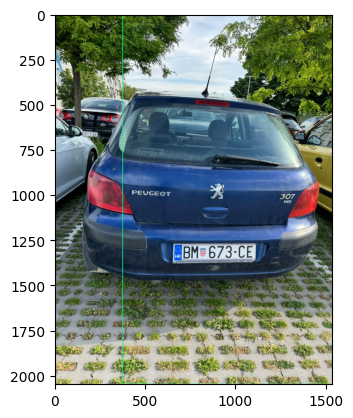

[([[418, 967], [647, 967], [647, 1017], [418, 1017]], 'PEUGEOT', 0.9833547974261323), ([[1241, 993], [1331, 993], [1331, 1029], [1241, 1029]], '307', 0.722446620464325), ([[1259, 1025], [1310, 1025], [1310, 1050], [1259, 1050]], 'HDI', 0.7807069252717903), ([[658, 1328], [700, 1328], [700, 1356], [658, 1356]], 'HR', 0.7187441203331164), ([[701, 1277], [803, 1277], [803, 1363], [701, 1363]], 'BM', 0.9988017226025154), ([[839, 1271], [1106, 1271], [1106, 1363], [839, 1363]], '673-CE', 0.9817945232266005)]


In [174]:
    img = cv2.imread(IMAGE_PATH)
    image = np.array(img)

    # Priprema inputa
    input_tensor = tf.convert_to_tensor(np.expand_dims(image, 0), dtype=tf.float32)

    # Detekcija
    detections = detect_fn(input_tensor)

    # Obrada rezultata detekcije
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes treba da budu int vrednosti
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image.copy()

    # Vizualizacija kutija i oznaka na slici
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'] + label_id_offset,
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=5,
        min_score_thresh=.8,
        agnostic_mode=False)

    # Nakon linije koja prikazuje sliku sa detekcijama
    plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.show()

    # Dodajte sledeći deo koda
    width = image.shape[1]
    height = image.shape[0]
    scores = list(filter(lambda x: x > detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]

    import easyocr
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(image)
    print(ocr_result)
    plt.show()

In [175]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

50
PEUGEOT
36
307
25
HDI
28
HR
86
BM
92
673-CE


[([[48, 966], [207, 966], [207, 1010], [48, 1010]], 'PEUGIE', 0.6384833407407376), ([[868, 996], [958, 996], [958, 1028], [868, 1028]], '307', 0.6927070021629333), ([[884, 1025], [937, 1025], [937, 1051], [884, 1051]], 'HDI', 0.22879327613705808), ([[288, 1326], [328, 1326], [328, 1358], [288, 1358]], 'HR ', 0.09334901447067914), ([[329, 1277], [431, 1277], [431, 1363], [329, 1363]], 'BM', 0.9940363850759502), ([[468, 1274], [733, 1274], [733, 1363], [468, 1363]], '673 CE', 0.7212343648653378), ([[430, 1362], [499, 1362], [499, 1381], [430, 1381]], 'llEQ', 0.03804765269160271)]


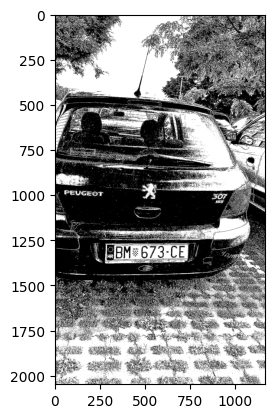

[([[420, 963], [646, 963], [646, 1018], [420, 1018]], 'PEUGEOT', 0.8663174049629445), ([[1239, 991], [1333, 991], [1333, 1031], [1239, 1031]], '307', 0.999927940033214), ([[1256, 1024], [1313, 1024], [1313, 1051], [1256, 1051]], 'HDl', 0.2124798121229085), ([[660, 1326], [700, 1326], [700, 1358], [660, 1358]], "HR'", 0.9687298940612341), ([[701, 1277], [805, 1277], [805, 1363], [701, 1363]], 'BM', 0.9996575318874399), ([[840, 1271], [1104, 1271], [1104, 1363], [840, 1363]], '673-CE', 0.7915642618063712), ([[805, 1363], [875, 1363], [875, 1379], [805, 1379]], '"Vilco}', 0.00847786569772657)]


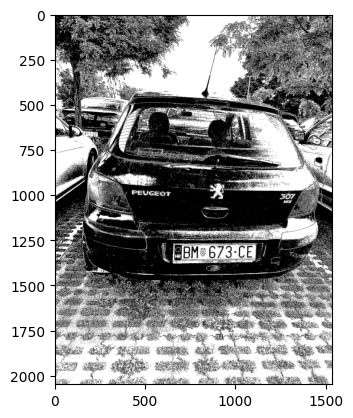

[([[20, 86], [60, 86], [60, 118], [20, 118]], 'HR ', 0.12265155515900703), ([[59, 37], [161, 37], [161, 125], [59, 125]], 'BM', 0.9515074567791685), ([[201, 35], [465, 35], [465, 123], [201, 123]], '673CE', 0.9909759611751768), ([[163, 123], [235, 123], [235, 139], [163, 139]], '"tulcQ}', 0.01070682146169375)]


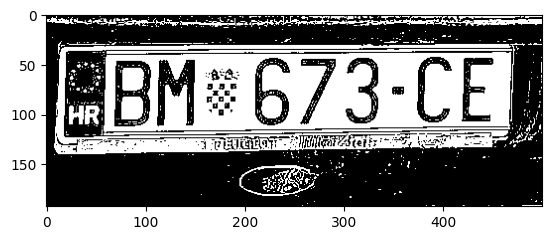

In [176]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

# Definicije funkcija za obradu slike
def apply_gaussian_noise(image):
    mean = 0
    stddev = 25
    noise = np.zeros_like(image)
    cv2.randn(noise, mean, stddev)
    noisy_image = cv2.add(image, noise)
    return noisy_image

def adjust_contrast(image, alpha=1.5, beta=0):
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image
    
def sharpen_image(image):
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

for idx, box in enumerate(boxes):
    roi = box * [height, width, height, width]
    region = image[int(roi[0]):int(roi[2]), int(roi[1]):int(roi[3])]
    
    # Primjena Gaussovog šuma
    noisy_region = apply_gaussian_noise(region)
    
    # Prilagođavanje kontrasta
    contrast_adjusted_region = adjust_contrast(noisy_region)
    sharpened_region = sharpen_image(contrast_adjusted_region)
    
    # Pretvaranje slike u sivu
    gray_region = cv2.cvtColor(sharpened_region, cv2.COLOR_BGR2GRAY)
    
    # Binariziranje slike
    _, binary_region = cv2.threshold(gray_region, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(binary_region)
    print(ocr_result)
    
    plt.imshow(binary_region, cmap='gray')
    plt.show()


In [177]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

32
HR 
88
BM
88
673CE
16
"tulcQ}


In [178]:
region_threshold = 0.01

In [179]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0] * region.shape[1]
    
    plate = [] 
    count = 0
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length * height / rectangle_size > region_threshold:
            plate.append(result[1])
            count += 1
    
    # Cut the first string and keep only the first three strings
    if count > 3:
        plate = plate[1:3]
    
    return plate


In [180]:
filter_text(region, ocr_result, region_threshold)

['BM', '673CE']

In [181]:
ocr_result = reader.readtext(region)
print("OCR Result:", ocr_result)

OCR Result: [([[18, 88], [58, 88], [58, 116], [18, 116]], 'HR', 0.9993605236236232), ([[59, 37], [163, 37], [163, 123], [59, 123]], 'BM', 0.9995392817432021), ([[200, 32], [465, 32], [465, 123], [200, 123]], '673-CE', 0.6978189905225513)]


In [182]:
text=filter_text(region, ocr_result, region_threshold)
print("Filtered Text:", text)

Filtered Text: ['HR', 'BM', '673-CE']


In [183]:
print("OCR Result:", ocr_result)
text = filter_text(region, ocr_result, region_threshold)
print("Filtered Text:", text)

OCR Result: [([[18, 88], [58, 88], [58, 116], [18, 116]], 'HR', 0.9993605236236232), ([[59, 37], [163, 37], [163, 123], [59, 123]], 'BM', 0.9995392817432021), ([[200, 32], [465, 32], [465, 123], [200, 123]], '673-CE', 0.6978189905225513)]
Filtered Text: ['HR', 'BM', '673-CE']


In [184]:
import csv
import uuid

In [185]:
filter_text(region, ocr_result, region_threshold)

['HR', 'BM', '673-CE']

In [186]:
'{}.jpg'.format(uuid.uuid1())

'41532eaa-2331-11ef-8edf-f930a6913ca6.jpg'

In [187]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, filter_text(region, ocr_result, region_threshold)])

In [188]:
text

['HR', 'BM', '673-CE']

In [189]:
save_results(filter_text(region, ocr_result, region_threshold), region, 'detection_results.csv', 'Detection_images')